In [23]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: c:\Users\hafst\.pyenv\pyenv-win\versions\3.11.0rc2\python.exe -m pip install --upgrade pip


In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [25]:


# Fetch S&P 500 data
df = yf.Ticker("^GSPC")
df = df.history(period="max")

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


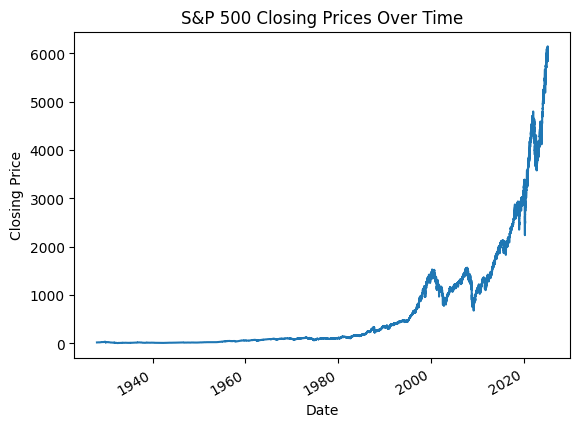

In [26]:
df['Close'].plot(title='S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

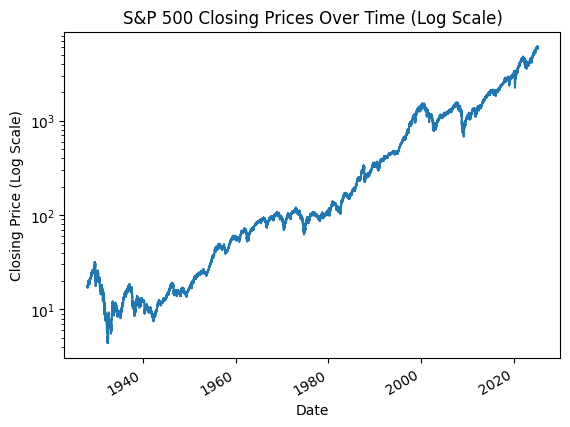

In [27]:
df['Close'].plot(title='S&P 500 Closing Prices Over Time (Log Scale)', logy=True)
plt.xlabel('Date')
plt.ylabel('Closing Price (Log Scale)')
plt.show()

ADF Statistic: -24.0722128273231
p-value: 0.0


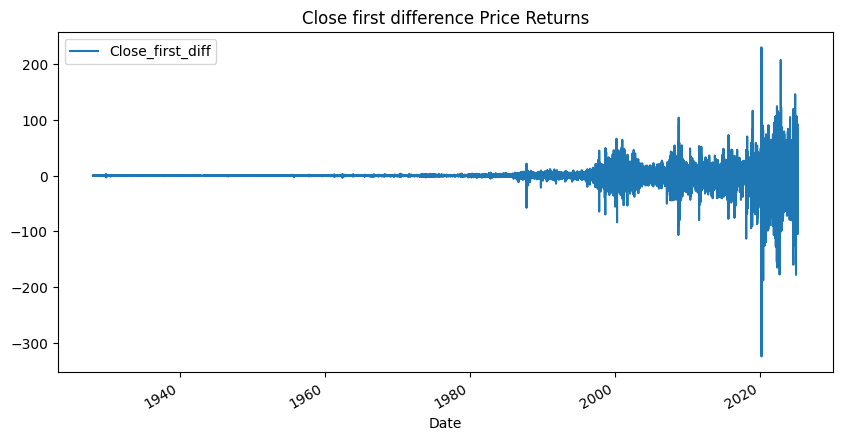

In [ ]:
df['Close_first_diff'] = df['Close'].diff()

df_diff = df['Close_first_diff'].dropna()

result = adfuller(df_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

df[["Close_first_diff"]].plot(figsize=(10,5), title="Close first difference Price Returns")
plt.show()



### Informal:
This proves that there are variances in returns